# Chapter 3: Exercise 13

**Import packages**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize, poly)

### (a) Generate a vector x containing n=100 observations from N(0, 1) distribution

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)

### (b) Generate a vector eps containing n=100 observations from N(0, 0.25) (mean=0, variance=0.25)

In [3]:
eps = rng.normal(loc=0, scale=np.sqrt(0.25), size=100)

### (c) Using x and eps generate a vector y according to $Y = -1 + 0.5X + \epsilon$

In [4]:
y = -1 + 0.5 * x + eps

In [5]:
len(y)

100

- **length(y)** = 100
- **$\beta_0$** = -1
- **$\beta_1$** = 0.5

### (d) Scatter plot between x and y

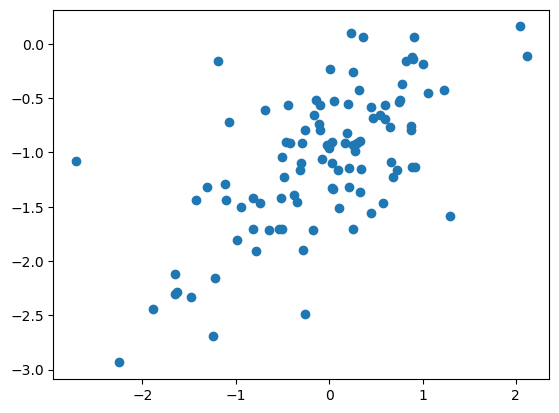

In [6]:
plt.scatter(x, y)

There appears to be a positive linear relationship between x and y.

### (e) Least squares linear model to predict y using x

In [7]:
dfx = pd.DataFrame({'intercept': np.ones(len(x)), 'x': x})

In [8]:
model = sm.OLS(y, dfx)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
x,0.4843,0.059,8.233,0.0


Our model performs surprisingly well. $-1.0380 = \hat{\beta_0} \approx \beta_0 = -1$ and $0.4843 = \hat{\beta_1} \approx \beta_1 = 0.5$

### (f) Plot of least squares line, population regression line, and scatterplot

In [10]:
beta0 = results.params[0]

In [11]:
beta1 = results.params[1]

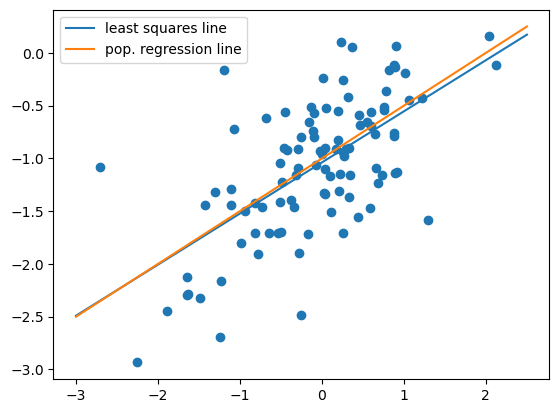

In [12]:
plt.scatter(x, y)
plt.plot([-3,2.5],[beta0 -3*beta1, beta0 + 2.5*beta1], label='least squares line')
plt.plot([-3,2.5],[-1 -3*0.5, -1 + 2.5*0.5], label='pop. regression line')
plt.legend()

### (g) Polynomial regression model that predicts $y$ using $x$ and $x^2$

In [13]:
df = pd.DataFrame({'x': x, 'y': y})

In [14]:
X = MS([poly('x', degree=2)]).fit_transform(df)

In [15]:
model2 = sm.OLS(y, X)
results2 = model2.fit()

In [16]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,-1.0737,0.050,-21.326,0.000
"poly(x, degree=2)[0]",4.1240,0.503,8.191,0.000
"poly(x, degree=2)[1]",-0.0261,0.503,-0.052,0.959


In [17]:
anova_lm(results, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,24.586567,0.0,NaN,NaN,NaN
1,97.0,24.585886,1.0,0.000681,0.002688,0.958757


There is no evidence the quadratic term improves the model fit. This is seen by the high p-value associated with the t-statistic as well as the high p-value associated with the F-statistic.

### (h) Repeat with less noise in the data (decrease variance in eps). Describe results.

In [18]:
eps = rng.normal(loc=0, scale=np.sqrt(0.125), size=100)

In [19]:
y = -1 + 0.5 * x + eps

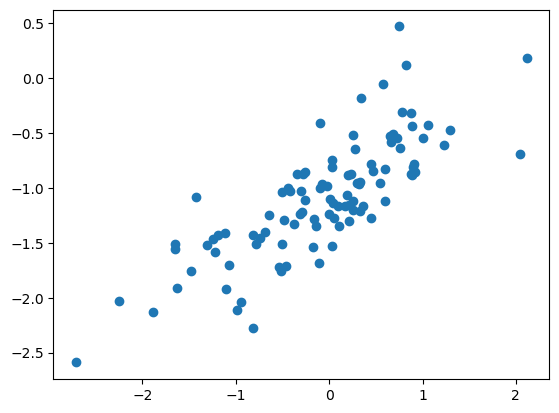

In [20]:
plt.scatter(x, y)

With less noise in the dataset our points track the population regression line much more closely.

In [21]:
model_lessnoise = sm.OLS(y, dfx)
results_lessnoise = model_lessnoise.fit()

In [22]:
summarize(results_lessnoise)

,coef,std err,t,P>|t|
intercept,-1.0572,0.033,-32.302,0.0
x,0.4955,0.038,12.939,0.0


With less noise our intercept is slightly more off, while the slope is closer to the true population regression line slope. However we get smaller standard errors, larger (in absolute value) t-stats, and subsequently smaller p-values, giving us more confidence in the fit of our model.

In [23]:
beta0 = results_lessnoise.params[0]

In [24]:
beta1 = results_lessnoise.params[1]

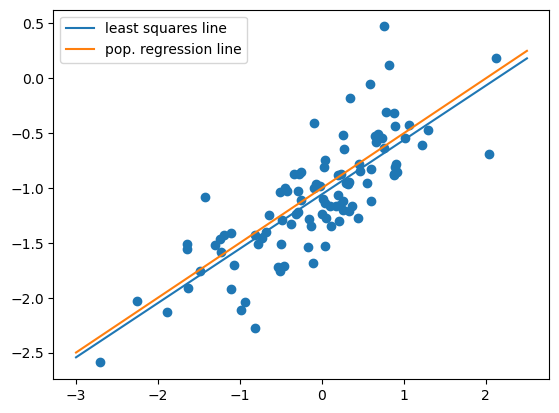

In [25]:
plt.scatter(x, y)
plt.plot([-3,2.5],[beta0 -3*beta1, beta0 + 2.5*beta1], label='least squares line')
plt.plot([-3,2.5],[-1 -3*0.5, -1 + 2.5*0.5], label='pop. regression line')
plt.legend()

The slope of our least squares line is almost identical to the population regression line slope, but the y-intercept is farther off than our other model.

### (i) Repeat with more noise in the data (increase variance in eps). Describe results.

In [26]:
eps = rng.normal(loc=0, scale=np.sqrt(0.75), size=100)

In [27]:
y = -1 + 0.5 * x + eps

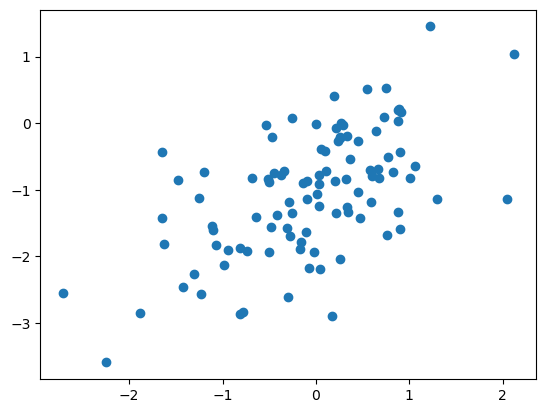

In [28]:
plt.scatter(x, y)

With more noise in the dataset our points are more spread out in a disorderly fashion from the true population regression line.

In [29]:
model_morenoise = sm.OLS(y, dfx)
results_morenoise = model_morenoise.fit()

In [30]:
summarize(results_morenoise)

,coef,std err,t,P>|t|
intercept,-1.0079,0.076,-13.308,0.0
x,0.6273,0.089,7.079,0.0


With more noise our intercept is closer to the true value (coincidence?), while the slope is further away from the true population regression equation value. We also have larger standard errors, smaller (in absolute value) t-stats, and thus larger p-values (although still statistically significant).

In [31]:
beta0 = results_morenoise.params[0]

In [32]:
beta1 = results_morenoise.params[1]

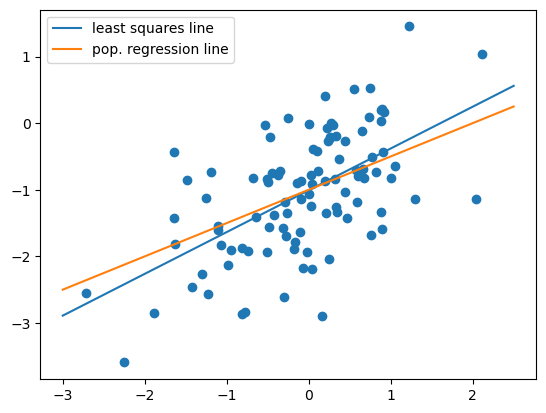

In [33]:
plt.scatter(x, y)
plt.plot([-3,2.5],[beta0 -3*beta1, beta0 + 2.5*beta1], label='least squares line')
plt.plot([-3,2.5],[-1 -3*0.5, -1 + 2.5*0.5], label='pop. regression line')
plt.legend()

The slope of our least squares line is farther off from the population regression line due to the increased noise in our dataset.

### (j) $95\%$ Confidence Intervals for $\beta_0$, $\beta_1$ 

**Original Dataset**

In [35]:
results.conf_int()

,0,1
intercept,-1.137782,-0.938244
x,0.367565,0.601017


In [62]:
print(np.abs(results.conf_int().iat[0,1] - results.conf_int().iat[0,0]))
print(np.abs(results.conf_int().iat[1,1] - results.conf_int().iat[1,0]))

0.19953841027538222
0.23345130161076766


**Less Noise Dataset**

In [36]:
results_lessnoise.conf_int()

,0,1
intercept,-1.122202,-0.992298
x,0.419491,0.571472


In [63]:
print(np.abs(results_lessnoise.conf_int().iat[0,1] - results_lessnoise.conf_int().iat[0,0]))
print(np.abs(results_lessnoise.conf_int().iat[1,1] - results_lessnoise.conf_int().iat[1,0]))

0.12990380540964164
0.15198182853727066


**More Noise Dataset**

In [37]:
results_morenoise.conf_int()

,0,1
intercept,-1.158232,-0.857632
x,0.451456,0.803146


In [64]:
print(np.abs(results_morenoise.conf_int().iat[0,1] - results_morenoise.conf_int().iat[0,0]))
print(np.abs(results_morenoise.conf_int().iat[1,1] - results_morenoise.conf_int().iat[1,0]))

0.30060067656955025
0.35168977799006074


Looking at the width of the confidence intervals (equivalently the margins of error) we see the less noise dataset is much more confident in the predictions for $\beta_0$ and $\beta_1$ than the more noise dataset, with the original dataset falling in the middle.